<a href="https://colab.research.google.com/github/sabbaninikhitha/Breast_Cancer_detection-/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind  # Import the t-test function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Loading data
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
#count the number of empty values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#removing empty column
df=df.dropna(axis=1)

In [ ]:
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#counting of malognant and benign cells
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

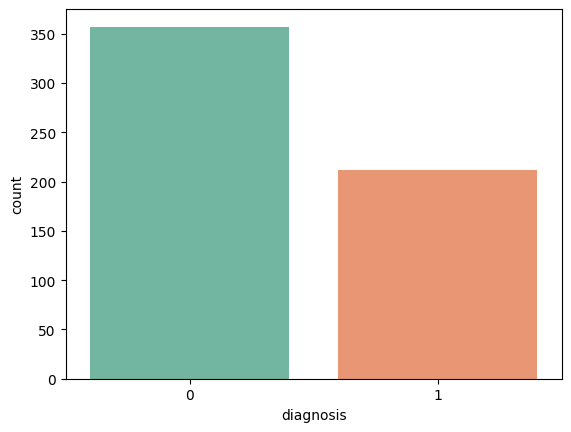

In [ ]:
#graph of M and B
sns.countplot(data=df,x='diagnosis',palette="Set2")

In [ ]:
# Feature extraction
X = df.iloc[:, 2:31].values
Y = df.iloc[:, 1].values
print(X.shape)
print(Y.shape)

(569, 29)
(569,)


In [ ]:
# Calculate additional statistical features (mean and standard deviation) for each feature for each sample
X_stat = []

for sample in range(X.shape[0]):
    sample_values = X[sample, :]

    # Calculate mean and standard deviation for each feature in the current sample
    mean = np.mean(sample_values)
    std_dev = np.std(sample_values)

    # Add these statistical features to X_stat
    X_stat.append([mean, std_dev])

# Convert X_stat to a NumPy array
X_stat = np.array(X_stat)

# Now, X_stat should have the same number of samples as X and Y
print("Shape of X_stat:", X_stat.shape)
print("Shape of Y:", Y.shape)

# Split data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_stat, Y, test_size=0.25, random_state=42)

# Scaling the data (feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Perform a t-test to determine if the means of these features are significantly different for benign and malignant cases
t_test_results = []

for feature in range(X_stat.shape[1]):
    benign_values = X_stat[Y == 0, feature]
    malignant_values = X_stat[Y == 1, feature]

    # Perform a t-test to compare the means of benign and malignant cases
    t_stat, p_value = ttest_ind(benign_values, malignant_values)

    t_test_results.append([t_stat, p_value])

# Convert t_test_results to a NumPy array
t_test_results = np.array(t_test_results)

# Choose a significance level (e.g., 0.05) to determine if a feature is statistically significant
significance_level = 0.05
significant_features = [i for i, (_, p_value) in enumerate(t_test_results) if p_value < significance_level]

Shape of X_stat: (569, 2)
Shape of Y: (569,)


In [ ]:
# Use the significant features for model building
X_train_selected = X_train[:, significant_features]
X_test_selected = X_test[:, significant_features]

In [ ]:
def train_models(X_train_selected, Y_train):
    # Initialize a list to store trained models
    models = []

    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=42)
    log.fit(X_train_selected, Y_train)
    models.append(log)

    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
    tree.fit(X_train_selected, Y_train)
    models.append(tree)

    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
    forest.fit(X_train_selected, Y_train)
    models.append(forest)

    # SVM Linear
    from sklearn.svm import SVC
    svc_model = SVC(kernel='linear', random_state=42)
    svc_model.fit(X_train_selected, Y_train)
    models.append(svc_model)

    # SVM RBF
    svc_rbf = SVC(kernel='rbf', random_state=42)
    svc_rbf.fit(X_train_selected, Y_train)
    models.append(svc_rbf)

    # KNeighbors Classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train_selected, Y_train)
    models.append(knn)

    # Gaussian NB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train_selected, Y_train)
    models.append(gauss)

    return models

In [ ]:
model=models(X_train_selected,Y_train)

[0]Logistic Regression Training Accuracy: 0.8967136150234741
[1]Desicion Tree Training Accuracy: 1.0
[2]Random Forest Training Accuracy: 0.9953051643192489
[3]svm Training Accuracy(linear): 0.892018779342723
[4]svm Training Accuracy(RBF): 0.8943661971830986
[5]KNeighbour classifier Training Accuracy: 0.9178403755868545
[6]Gaussian NB Training Accuracy: 0.8967136150234741


In [ ]:
#test accuracy data on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print('model:',i)
  cm=confusion_matrix(Y_test,model[i].predict(X_test_selected))
  tp=cm[0][0]
  tn=cm[1][1]
  fn=cm[1][0]
  fp=cm[0][1]

  print(cm)
  print('Testing Accuracy:',(tp+tn)/(tp+tn+fn+fp))
  print()

model: 0
[[88  1]
 [ 6 48]]
Testing Accuracy: 0.951048951048951

model: 1
[[81  8]
 [ 3 51]]
Testing Accuracy: 0.9230769230769231

model: 2
[[83  6]
 [ 5 49]]
Testing Accuracy: 0.9230769230769231

model: 3
[[88  1]
 [ 6 48]]
Testing Accuracy: 0.951048951048951

model: 4
[[88  1]
 [ 6 48]]
Testing Accuracy: 0.951048951048951

model: 5
[[83  6]
 [ 5 49]]
Testing Accuracy: 0.9230769230769231

model: 6
[[88  1]
 [ 6 48]]
Testing Accuracy: 0.951048951048951

